In [3]:
from urllib import request, error
#import a module with classes and functions which help opening URL's
from bs4 import BeautifulSoup as bs
#A library that makes webscraping easier


site1 = "https://worldpopulationreview.com/country-rankings/crime-rate-by-country"
#save the site we want to extract from to a variable
response = bs(request.urlopen(site1),"html.parser")
#opens a conection to the site, and stores the html content
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")
#searches the html for the first table with the class specified
rows = TAB.find_all("tr")
#searches the table for al tr tags

with open("Crime.csv", "w") as file:
    #creates a file called Crime.csv and writes to it
    file.write("..,Country,Crime index,Safety index")
    #creating column headers
    for row in rows:
        cells = row.find_all("td")
        #finds data cells in the row
        rowContents = []
        #creates a blank list
        for cell in cells:
            rowContents.append(cell.text.strip())
            #appents the data to the list
        file.write(",".join(rowContents) + "\n")
        #list is written to the files

In [4]:
import pandas as pd
#import the pandas library to work with dataframes
Crimedf = pd.read_csv("Crime.csv")
#our csv file is imported to a dataframe
Crimedf.drop(columns=["..", "Safety index"], axis=1, inplace=True)
#dropping columns we will not be working with
pd.to_numeric(Crimedf["Crime index"], errors="coerce")
#convert data to numeric
Crimedf


,Country,Crime index
0,Venezuela,81.2
1,Papua New Guinea,79.7
2,Afghanistan,78.3
3,Haiti,77.9
4,South Africa,75.4
...,...,...
136,Oman,19.0
137,Taiwan,16.7
138,Qatar,16.0
139,United Arab Emirates,15.6


In [57]:
site2 = "https://worldpopulationreview.com/country-rankings/gini-coefficient-by-country"
#import another table
response = bs(request.urlopen(site2),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("Gini.csv", "w") as file:
    file.write("..,Country,Gini Coefficient (%),1,2,3")
    for row in rows:
        cells = row.find_all("td")
        rowContents = []
        for cell in cells:
            rowContents.append(cell.text.strip())
        file.write(",".join(rowContents) + "\n")

In [87]:
Ginidf = pd.read_csv("Gini.csv")
Ginidf.drop(columns=["..", "1", "2", "3"], axis=1, inplace=True)
Ginidf["Gini Coefficient (%)"]=Ginidf["Gini Coefficient (%)"].str.replace("%", "")
#removing the percentage symbol so we can convert to numeric
Ginidf["Gini Coefficient (%)"]= pd.to_numeric(Ginidf["Gini Coefficient (%)"], errors="coerce")
Ginidf


,Country,Gini Coefficient (%)
0,South Africa,63.0
1,Namibia,59.1
2,Colombia,54.8
3,Eswatini,54.6
4,Botswana,53.3
...,...,...
229,Montserrat,NaN
230,Falkland Islands,NaN
231,Tokelau,NaN
232,Niue,NaN


In [89]:
site3 = "https://worldpopulationreview.com/country-rankings/hdi-by-country"

response = bs(request.urlopen(site3),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("HDI.csv", "w") as file:
    file.write("..,Country,HDI tier,HDI")
    for row in rows:
        cells = row.find_all("td")
        rowContents = []
        for cell in cells:
            rowContents.append(cell.text.strip())
        file.write(",".join(rowContents) + "\n")

In [91]:
HDIdf = pd.read_csv("HDI.csv")
HDIdf.drop(columns=["..", "HDI tier"], axis=1, inplace=True)
HDIdf

,Country,HDI
0,United States,0.927
1,Russia,0.821
2,Japan,0.920
3,Turkey,0.855
4,Germany,0.950
...,...,...
188,Saint Vincent and the Grenadines,0.772
189,Dominica,0.740
190,Marshall Islands,0.731
191,Palau,0.797


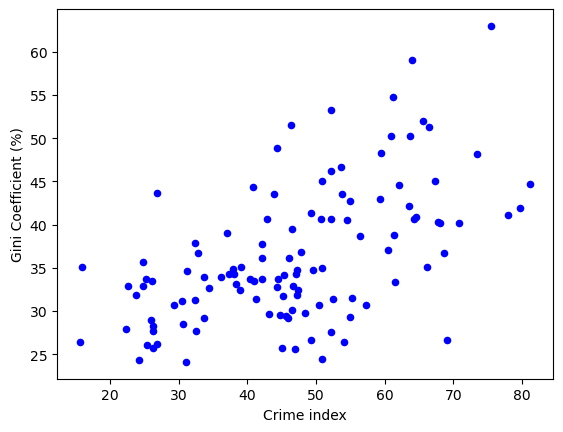

In [93]:
import matplotlib.pyplot as plt
#we will use matplotlib for plots
crimevsgini = pd.merge(Crimedf, Ginidf, on="Country",how="inner")
#merging crime and gini dataframe so we can compare them
crimevsgini
scatter1 = crimevsgini.plot.scatter(x="Crime index", y="Gini Coefficient (%)", c="Blue")
#making scatter plot
fig = scatter1.get_figure()
fig.savefig("CrimevsGini.png")
#saving the figure as a png

In [145]:
from numpy import cov
import statistics
import math
from scipy.stats import t

crimevsgini = crimevsgini.dropna()
n= len(crimevsgini)
covariance = cov(crimevsgini["Crime index"], crimevsgini["Gini Coefficient (%)"])

cov_xy = covariance[0, 1]

crimeList = list(crimevsgini["Crime index"])
giniList = list(crimevsgini["Gini Coefficient (%)"])

stdevx = statistics.stdev(crimeList)
stdevy = statistics.stdev(giniList)

corr = cov_xy/(stdevx*stdevy)

tvalue = corr*math.sqrt((n-2)/(1-corr**2))
df = 28
pvalue = 2 * t.sf(abs(tvalue), df)
print(corr)
print(pvalue)

0.5549908301802726
8.720896663569343e-08
Correlation coefficient (r): 0.5549908301802727
P-value: 8.393596060847778e-11


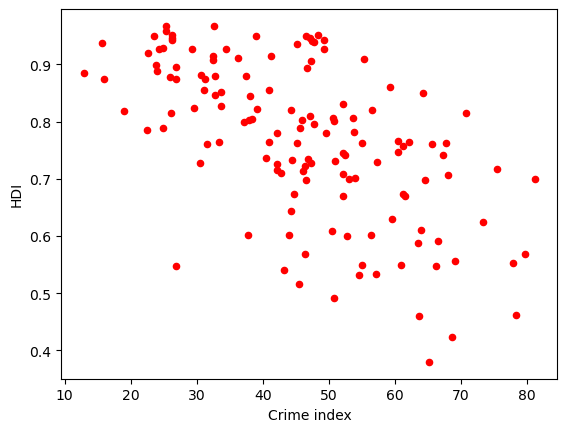

In [117]:
crimevsHDI = pd.merge(Crimedf, HDIdf, on="Country")
crimevsHDI
scatter2 = crimevsHDI.plot.scatter(x="Crime index", y="HDI", c="red")
fig = scatter2.get_figure()
fig.savefig("CrimevsHDI.png")

In [121]:
covariance = cov(crimevsHDI["Crime index"], crimevsHDI["HDI"])

crimevsHDI = crimevsHDI.dropna()

crimeList = list(crimevsHDI["Crime index"])
HDIList = list(crimevsHDI["HDI"])

stdevx = statistics.stdev(crimeList)
stdevy = statistics.stdev(HDIList)

corr = covariance/(stdevx*stdevy)
print(corr)
#stdevx

[[ 1.10823206e+02 -5.96415274e-01]
 [-5.96415274e-01  9.02338088e-03]]


In [19]:
import shutil
#shutil is a libraty used for file operation
import os
#os will also be used for file operations
request.urlretrieve("https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv", "GiniUK.zip")
#this dataset offered a direct download link to its data, so we will directly download it to a zip file
shutil.unpack_archive("GiniUK.zip")
#using shutil to extract files
os.rename("API_SI.POV.GINI_DS2_en_csv_v2_19376.csv", "GiniUK.csv")
#renaming the file containing our data



FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'API_SI.POV.GINI_DS2_en_csv_v2_19376.csv' -> 'GiniUK.csv'

,Country Name,Year,Gini
81,United Kingdom,1960.0,NaN
347,United Kingdom,1961.0,NaN
613,United Kingdom,1962.0,NaN
879,United Kingdom,1963.0,NaN
1145,United Kingdom,1964.0,NaN
...,...,...,...
16307,United Kingdom,2021.0,32.4
16573,United Kingdom,2022.0,NaN
16839,United Kingdom,2023.0,NaN
17105,United Kingdom,2024.0,NaN


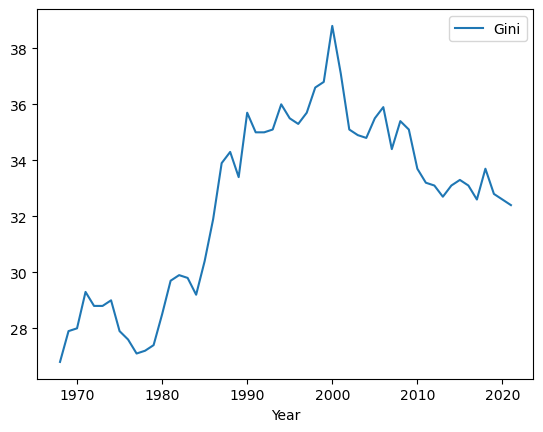

In [21]:
GiniUKdf = pd.read_csv("GiniUK.csv", header=2)
#this dataframe starts from row 3 because there is some unnecesary information
GiniUKdf = GiniUKdf.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
GiniUKdf = pd.melt(GiniUKdf, id_vars=["Country Name"], var_name="Year", value_name="Gini")
GiniUKdf = GiniUKdf[GiniUKdf["Country Name"] == "United Kingdom"]
#some data cleaning
GiniUKdf[["Gini", "Year"]] = GiniUKdf[["Gini", "Year"]].apply(lambda col: pd.to_numeric(col, errors="coerce"))
#applting numeric to multiple columns
lines = GiniUKdf.plot.line(x="Year", y="Gini")
GiniUKdf

In [26]:
import urllib.request

site4 = "https://www.ons.gov.uk/generator?uri=/peoplepopulationandcommunity/crimeandjustice/bulletins/crimeinenglandandwales/yearendingseptember2024/6580d8c7&format=csv"
filename = "CrimeUK.csv"

req = urllib.request.Request(
    site4,
    headers={"User-Agent": "Mozilla"}
)
#this website did not allow webscraping so 
with urllib.request.urlopen(req) as response:
    with open("CrimeUK.csv", "wb") as out_file:
        out_file.write(response.read())

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ronni\AppData\Local\Temp\ipykernel_20132\3284895494.py:4: SyntaxWarning: invalid escape sequence '\d'
  CrimeUKdf["Year"] = CrimeUKdf["Year"].str.extract("(\d+)", expand=False)


,Year,Crime
0,1981,11303.0
2,1983,12128.0
6,1987,13647.0
10,1991,15564.0
12,1993,18835.0
14,1995,19786.0
16,1997,17168.0
18,1999,15247.0
21,2002,12771.0
22,2003,12390.0


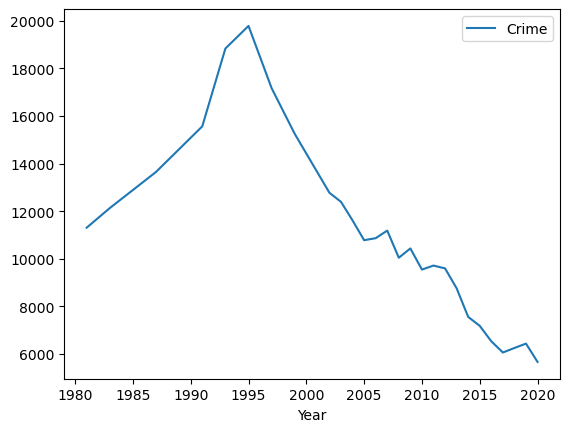

In [28]:
CrimeUKdf = pd.read_csv("CrimeUK.csv", header = 6)
CrimeUKdf.drop(columns=["CSEW estimate including fraud and computer misuse", "CSEW headline estimates excluding fraud and computer misuse - YE September ", "CSEW headline estimates including fraud and computer misuse - YE September"], axis=1, inplace=True)
CrimeUKdf.rename(columns={"CSEW estimates excluding fraud and computer misuse": "Crime", "Unnamed: 0": "Year"}, inplace=True)
CrimeUKdf["Year"] = CrimeUKdf["Year"].str.extract("(\d+)", expand=False)
#this removes the non numeric characters from the Year column, for example March 1981 becomes 1981
CrimeUKdf[["Crime", "Year"]] = CrimeUKdf[["Crime", "Year"]].apply(lambda col: pd.to_numeric(col, errors="coerce"))
CrimeUKdf.dropna(subset=["Crime"], inplace=True)
#drop null values
lines = CrimeUKdf.plot.line(x="Year", y="Crime")
CrimeUKdf


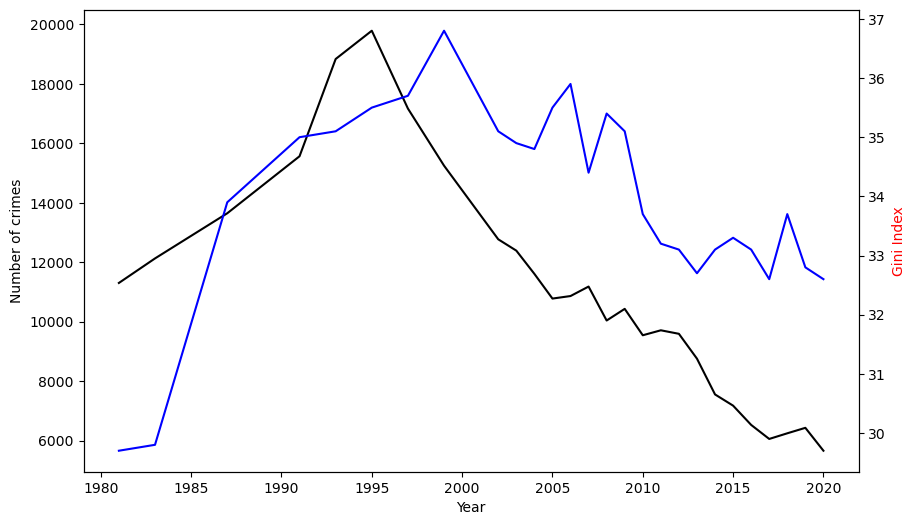

In [30]:
import matplotlib.pyplot as plt

crimeginiuk = pd.merge(CrimeUKdf, GiniUKdf, on="Year")

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of crimes", color = "black")
ax1.plot(crimeginiuk["Year"], crimeginiuk["Crime"], color = "black", label = "Crime")

ax2 = ax1.twinx()

ax2.set_ylabel("Gini Index", color = "blue")
ax2.plot(crimeginiuk["Year"], crimeginiuk["Gini"], color = "blue", label="Gini Index (%)")
crimeginiuk

plt.savefig("UKCrimeGini.png")

In [32]:
site5 = "https://countryeconomy.com/hdi/uk"

response = bs(request.urlopen(site5),"html.parser")
TAB = response.find("table", class_="table tabledat table-striped table-condensed table-hover")

rows = TAB.find_all("tr")

with open("HDIUK.csv", "w") as file:
    file.write("Year, HDI, Rank")
    for row in rows:
        cells = row.find_all("td")
        rowContents = []
        for cell in cells:
            rowContents.append(cell.text.strip())
        file.write(",".join(rowContents) + "\n")

,Year,HDI
0,2022,0.940
1,2021,0.931
2,2020,0.920
3,2019,0.933
4,2018,0.928
5,2017,0.929
6,2016,0.926
7,2015,0.923
8,2014,0.924
9,2013,0.923


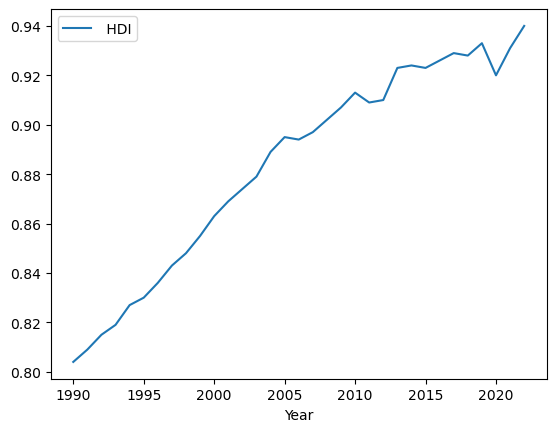

In [34]:
HDIUKdf = pd.read_csv("HDIUK.csv", encoding_errors="replace")
HDIUKdf.drop(columns=[" Rank"], axis=1, inplace=True)
HDIUKdf
lines = HDIUKdf.plot.line(x="Year", y=" HDI")
HDIUKdf

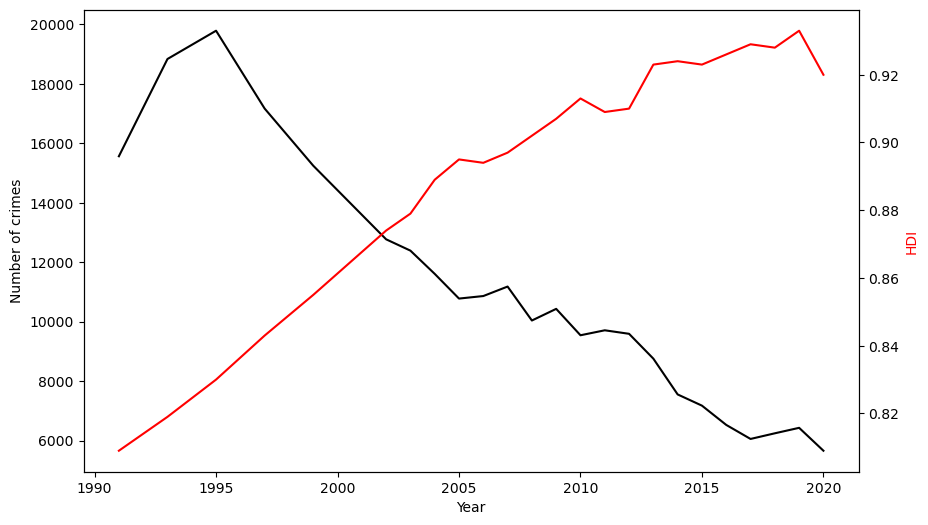

In [51]:
crimehdiuk = pd.merge(CrimeUKdf, HDIUKdf, on="Year")
crimehdiuk
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of crimes", color = "black")
ax1.plot(crimehdiuk["Year"], crimehdiuk["Crime"], color = "black", label = "Crime")

ax2 = ax1.twinx()

ax2.set_ylabel("HDI", color = "red")
ax2.plot(crimehdiuk["Year"], crimehdiuk[" HDI"], color = "red", label="HDI")
crimehdiuk

plt.savefig("UKCrimeHDI.png")

In [38]:
site7 = "https://tradingeconomics.com/country-list/gdp-per-capita?continent=world"

req = urllib.request.Request(
    site7,
    headers={"User-Agent": "Mozilla"}
)
#same code as before to bypass the webscraping block
response = bs(request.urlopen(req),"html.parser")
TAB = response.find("table", class_="table table-hover table-heatmap")

rows = TAB.find_all("tr")

with open("GDP.csv", "w") as file:
    file.write("Country,GDP Per Capita,GDPp,Date,Currency")
    for row in rows:
        cells = row.find_all("td")
        rowContents = []
        for cell in cells:
            rowContents.append(cell.text.strip())
        file.write(",".join(rowContents) + "\n")

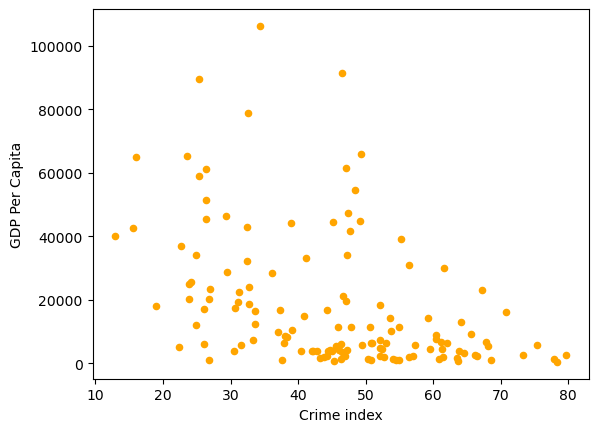

In [40]:
GDPdf = pd.read_csv("GDP.csv", encoding_errors="replace")
GDPdf.drop(columns=["GDPp", "Date", "Currency"], axis=1, inplace=True)
#pd.to_numeric(HDIUKdf["Crime index"], errors="coerce")
GDPdf
GDPvsCrime = pd.merge(Crimedf, GDPdf, on="Country",how="inner")
GDPvsCrime
scatter3 = GDPvsCrime.plot.scatter(x="Crime index", y="GDP Per Capita", c="Orange")
fig = scatter3.get_figure()
fig.savefig("CrimevsGDP.png")
#lines = HDIUKdf.plot.line(x="Year", y="HDI")

In [113]:
covariance = cov(GDPvsCrime["Crime index"], GDPvsCrime["GDP Per Capita"])

GDPvsCrime = GDPvsCrime.dropna()

crimeList = list(GDPvsCrime["Crime index"])
GDPList = list(GDPvsCrime["GDP Per Capita"])

stdevx = statistics.stdev(crimeList)
stdevy = statistics.stdev(GDPList)

corr = covariance/(stdevx*stdevy)
print(corr)
#stdevx
crimeList

[[ 6.95285990e-04 -4.38353861e-01]
 [-4.38353861e-01  1.43825708e+03]]


[79.7,
 78.3,
 77.9,
 75.4,
 73.4,
 70.8,
 68.6,
 68.1,
 67.8,
 67.3,
 66.5,
 66.2,
 65.6,
 64.6,
 64.2,
 63.9,
 63.7,
 63.5,
 62.1,
 61.7,
 61.5,
 61.3,
 61.2,
 60.9,
 60.5,
 60.4,
 59.5,
 59.3,
 57.3,
 57.1,
 56.5,
 56.4,
 55.3,
 55.0,
 55.0,
 54.5,
 54.0,
 53.8,
 53.7,
 53.0,
 52.8,
 52.4,
 52.2,
 52.2,
 52.2,
 52.2,
 50.9,
 50.8,
 50.8,
 50.7,
 50.4,
 49.5,
 49.3,
 49.2,
 48.4,
 47.8,
 47.7,
 47.4,
 47.3,
 47.3,
 47.1,
 47.1,
 46.9,
 46.7,
 46.5,
 46.5,
 46.4,
 46.4,
 46.1,
 45.9,
 45.6,
 45.4,
 45.2,
 45.1,
 44.7,
 44.4,
 44.3,
 44.3,
 43.9,
 43.2,
 42.8,
 42.2,
 42.1,
 41.2,
 40.9,
 40.4,
 39.1,
 38.9,
 38.3,
 38.0,
 37.9,
 37.7,
 37.4,
 37.1,
 36.2,
 34.4,
 33.7,
 33.7,
 33.4,
 32.8,
 32.8,
 32.6,
 32.4,
 32.4,
 31.6,
 31.2,
 31.1,
 30.7,
 30.5,
 29.5,
 29.3,
 26.9,
 26.8,
 26.8,
 26.3,
 26.3,
 26.3,
 26.1,
 26.0,
 25.4,
 25.3,
 24.9,
 24.9,
 24.2,
 23.9,
 23.8,
 23.5,
 22.6,
 22.4,
 19.0,
 16.0,
 15.6,
 12.9]

In [42]:
urllib.request.urlretrieve("https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv", "GDPUK.zip")
shutil.unpack_archive("GDPUK.zip")


In [43]:
os.rename("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_19346.csv", "GDPUK.csv")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_19346.csv' -> 'GDPUK.csv'

,Country Name,Year,GDP Per Capita
81,United Kingdom,1960.0,1397.594803
347,United Kingdom,1961.0,1472.385714
613,United Kingdom,1962.0,1525.775853
879,United Kingdom,1963.0,1613.456884
1145,United Kingdom,1964.0,1748.288118
...,...,...,...
16307,United Kingdom,2021.0,46896.866243
16573,United Kingdom,2022.0,45935.927647
16839,United Kingdom,2023.0,49463.855462
17105,United Kingdom,2024.0,NaN


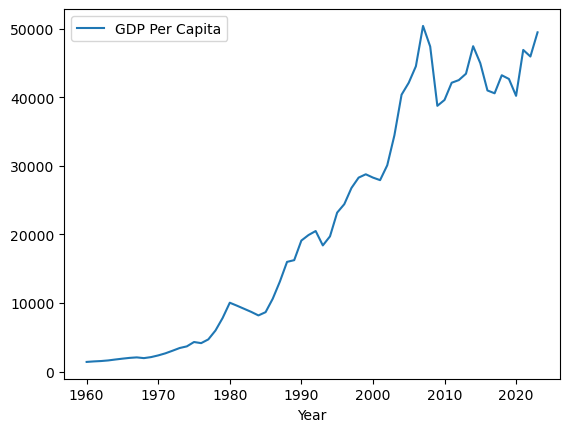

In [45]:
GDPUKdf = pd.read_csv("GDPUK.csv", header=2)
GDPUKdf = GDPUKdf.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
GDPUKdf = pd.melt(GDPUKdf, id_vars=["Country Name"], var_name="Year", value_name="GDP Per Capita")
GDPUKdf = GDPUKdf[GDPUKdf["Country Name"] == "United Kingdom"]
GDPUKdf["Year"] = GDPUKdf["Year"].apply(lambda col: pd.to_numeric(col, errors="coerce"))
lines = GDPUKdf.plot.line(x="Year", y="GDP Per Capita")
GDPUKdf

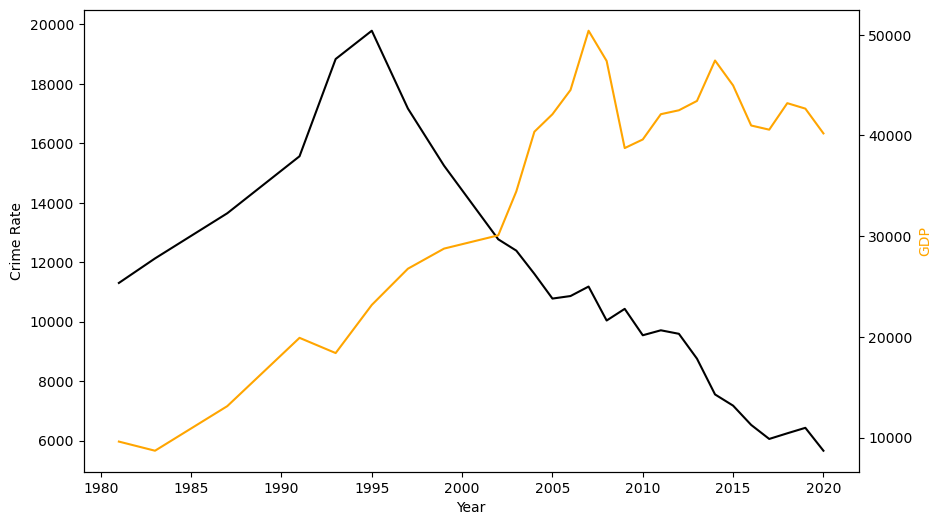

In [49]:
crimegdpuk = pd.merge(CrimeUKdf, GDPUKdf, on="Year")
crimegdpuk
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of crimes", color = "black")
ax1.plot(crimegdpuk["Year"], crimegdpuk["Crime"], color = "black", label = "Crime")

ax2 = ax1.twinx()

ax2.set_ylabel("GDP", color = "orange")
ax2.plot(crimegdpuk["Year"], crimegdpuk["GDP Per Capita"], color = "orange", label="GDP")
crimegdpuk

plt.savefig("UKCrimeGDP.png")